In [1]:
import tensorflow as tf
import numpy as np
import random
from matplotlib import pyplot as plt
import matplotlib
import os
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [2]:
tf.__version__

'1.14.0'

In [3]:
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='b')
    c = tf.add(a, b)

with tf.Session() as sess:
    print (sess.run(c))

[[ 2.  4.  6.]
 [ 8. 10. 12.]]


In [4]:
noise_factor = 0.5
train_images_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)  
test_images_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape) 
# numpy.random.normal 函數裡的三個參數分别代表生成的高斯分布的均值、標準差以及輸出的 size

train_images_noisy = np.clip(train_images_noisy, 0., 1.)  # 把 array 限制在一定範圍内
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

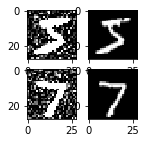

In [5]:
fig = plt.figure(figsize=(2, 2))
fig.add_subplot(2, 2, 1)
plt.imshow(train_images_noisy[0], cmap="gray")
fig.add_subplot(2, 2, 2)
plt.imshow(train_images[0], cmap="gray")

fig.add_subplot(2, 2, 3)
plt.imshow(test_images_noisy[0], cmap="gray")
fig.add_subplot(2, 2, 4)
plt.imshow(test_images[0], cmap="gray")


In [6]:
# pre-process
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

# keep original test image as copy 
o_test_images = test_images

# Reshape from (N, 28, 28) to (N, 784)
train_images = np.reshape(train_images, (TRAINING_SIZE, 784))
test_images = np.reshape(test_images, (TEST_SIZE, 784))
train_images_noisy = np.reshape(train_images_noisy, (TRAINING_SIZE, 784))
test_images_noisy = np.reshape(test_images_noisy, (TEST_SIZE, 784))

# Convert the array to float32 as opposed to uint8
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)
train_images_noisy = train_images_noisy.astype(np.float32)
test_images_noisy = test_images_noisy.astype(np.float32)

# Convert the pixel values from integers between 0 and 255 to floats between 0 and 1
train_images /= 255
test_images /=  255
train_images_noisy /= 255
test_images_noisy /= 255

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [7]:
def add_layer(inputs, in_size, out_size, activation_function=None):
  Weights = tf.Variable(tf.truncated_normal(shape=(in_size,out_size) , mean=0 , stddev=0.3 ))
  biases = tf.Variable(tf.zeros(shape=(out_size)) + 0.1)
  Wx_plus_b = tf.matmul(inputs, Weights) + biases
  if activation_function is None:
    output = Wx_plus_b
  else:
    output = activation_function(Wx_plus_b)
  return output

In [8]:
# Build Model
x = tf.placeholder(tf.float32 , shape=(None,784))
y = tf.placeholder(tf.float32 , shape=(None,784))
layer_1 = add_layer(x , 784 , 128 , tf.nn.sigmoid)
layer_2 = add_layer(layer_1 , 128 , 10 , tf.nn.sigmoid)
layer_3 = add_layer(layer_2 , 10 , 2 , tf.nn.sigmoid)
layer_4 = add_layer(layer_3 , 2 , 10 , tf.nn.sigmoid)
layer_5 = add_layer(layer_4 , 10 , 128 , tf.nn.sigmoid)
output_layer = add_layer(layer_5 , 128 , 784 , tf.nn.sigmoid)

In [9]:
loss = tf.reduce_mean(tf.pow(output_layer - y, 2))

In [10]:
#optimizer = tf.train.RMSPropOptimizer(learning_rate = 0.01).minimize(loss)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01).minimize(loss)

W0911 00:13:14.540718 140381577058112 deprecation.py:323] From /home/tsung/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
epochs = 30
batch_size = 256
example_to_show = 10
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [12]:
for epoch in range(epochs):
  index = [i for i in range(train_images.shape[0])]
  random.shuffle(index)
  while len(index)>0:
    index_size = len(index)
    batch_index = [index.pop() for _ in range(min(batch_size,index_size))]
    batch_x = train_images[batch_index]
    batch_y = train_images[batch_index]
    sess.run(optimizer , feed_dict={
                            x:batch_x,
                            y:batch_y
                        })

  print("epoch", epoch,", loss = ", 
                sess.run(loss ,
                        feed_dict={
                            x:batch_x,
                            y:batch_y
                        }) 
       )

epoch 0 , loss =  0.064885326
epoch 1 , loss =  0.055311743
epoch 2 , loss =  0.059940338
epoch 3 , loss =  0.052702487
epoch 4 , loss =  0.051473767
epoch 5 , loss =  0.051664118
epoch 6 , loss =  0.051285055
epoch 7 , loss =  0.053950652
epoch 8 , loss =  0.048978753
epoch 9 , loss =  0.049029004
epoch 10 , loss =  0.050654937
epoch 11 , loss =  0.046866626
epoch 12 , loss =  0.04938315
epoch 13 , loss =  0.04598256
epoch 14 , loss =  0.05138817
epoch 15 , loss =  0.048313323
epoch 16 , loss =  0.048611853
epoch 17 , loss =  0.04929036
epoch 18 , loss =  0.044790585
epoch 19 , loss =  0.045821074
epoch 20 , loss =  0.046755686
epoch 21 , loss =  0.046763062
epoch 22 , loss =  0.04765436
epoch 23 , loss =  0.04899395
epoch 24 , loss =  0.042390183
epoch 25 , loss =  0.04576641
epoch 26 , loss =  0.042783126
epoch 27 , loss =  0.047526125
epoch 28 , loss =  0.043560985
epoch 29 , loss =  0.04595337


In [13]:
batch_x = test_images[:example_to_show]
batch_y = test_images[:example_to_show]
output_nd = sess.run(output_layer ,
                feed_dict={
                        x:batch_x,
                        y:batch_y
                   }) 
print(output_nd.shape)

(10, 784)


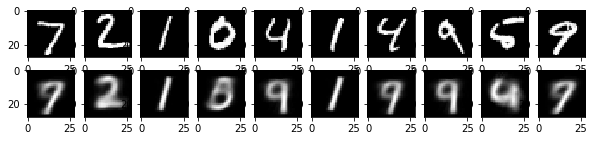

In [14]:
fig, axis = plt.subplots(2, example_to_show, figsize=(example_to_show, 2))
for i in range(0, example_to_show):
    img_original = np.reshape(batch_x[i], (28, 28))
    axis[0][i].imshow(img_original, cmap='gray')
    img = np.reshape(output_nd[i], (28, 28))
    axis[1][i].imshow(img, cmap='gray')
plt.show()

(10000, 2)


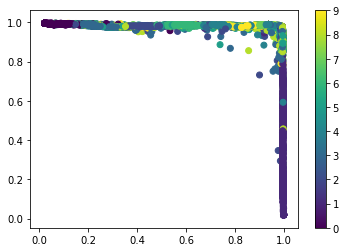

In [15]:
encoder_result = sess.run(layer_3, feed_dict={x: test_images, y:test_images})
print(encoder_result.shape)
plt.scatter(encoder_result[:, 0], encoder_result[:, 1], c=test_labels[:])
plt.colorbar()
plt.show()